Ulfa Zakiatul Mardhiah 201810370311058

Tsabita Nurul Izzah 201810370311082

EMAIL CLASSIFICATION SPAM & NOT SPAM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Semester\ 6/PBA/

/content/drive/MyDrive/Semester 6/PBA


In [ ]:
ls

 emails.csv   glove.840B.300d/  'PBA B.ipynb'


In [ ]:
import nltk
import pandas as pd
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [ ]:
#Improve 1
#Load Dataset

dta = pd.read_csv('emails.csv')
dta.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
#Mengecheck nilai null
ta.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
#Menghitung jumlah data di kategori spam
dta['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [ ]:
#Menghilangkan tanda baca
def remove_punctuation(text):
    no_punct="".join([words for words in text if words not in string.punctuation])
    return no_punct
dta["text"] = dta['text'].apply(lambda x: remove_punctuation(x))
dta.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


PREPROCESSING DATA

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Removing Stopwords (kata umum yang biasanya muncul dalam jumlah besar dan tidak memiliki makna)
stopword = set(stopwords.words('english'))
stopword.add('Subject')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopword])
dta['text'] = dta['text'].apply(lambda x: remove_stopwords(x))
dta.head()

,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new homes made easy im wanting sh...,1
3,4 color printing special request additional in...,1
4,money get software cds software compatibility ...,1


In [ ]:
# Tokenizing (memisahkan teks menjadi potongan-potongan berupa token)

def tokenize(text):
    split=re.split("\W+",text) 
    return split
dta['text']=dta['text'].apply(lambda x: tokenize(x.lower()))
dta.head()

,text,spam
0,"[naturally, irresistible, corporate, identity,...",1
1,"[stock, trading, gunslinger, fanny, merrill, m...",1
2,"[unbelievable, new, homes, made, easy, im, wan...",1
3,"[4, color, printing, special, request, additio...",1
4,"[money, get, software, cds, software, compatib...",1


In [ ]:
#Improve 2
import nltk
nltk.download('wordnet')

# Lemmatizing (Mengkategorikan kata yang memiliki makna sama)

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

dta['text'] = dta["text"].apply(lambda text: lemmatize_words(text))
dta.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,text,spam
0,naturally irresistible corporate identity lt r...,1
1,stock trading gunslinger fanny merrill muzo co...,1
2,unbelievable new home made easy im wanting sho...,1
3,4 color printing special request additional in...,1
4,money get software cd software compatibility g...,1


In [ ]:
# Splitting the data according to spam and non-spam 
spam = " ".join(dta[dta['spam'] == 1]['text'].tolist())
non_spam = " ".join(dta[dta['spam'] == 0]['text'].tolist())

In [ ]:
# Finding most repeated words in the data
def return_top_words(text,words = 10):
    allWords = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    
    mostCommontuples= allWordExceptStopDist.most_common(words)
    mostCommon = [tupl[0] for tupl in mostCommontuples]
    return mostCommon

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
top_15_spam = return_top_words(spam,15)
top_15_non_spam = return_top_words(non_spam,15)

WORDCLOUD

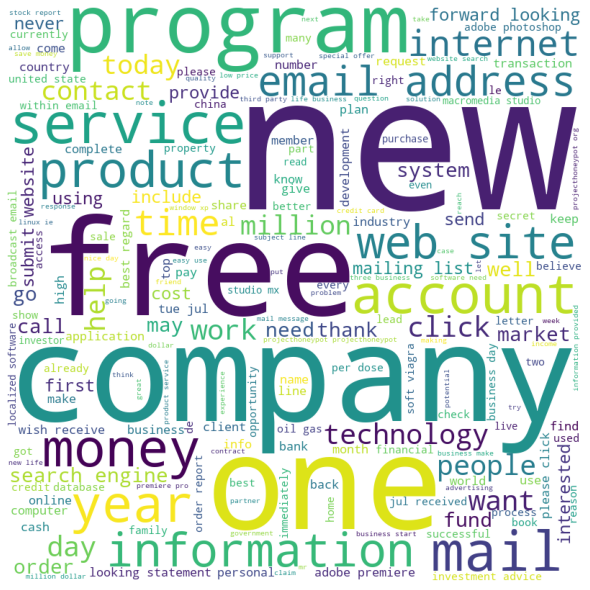

In [ ]:
#Improve 3
#Memunculkan kata yang sering muncul di email yang termasuk spam
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dta.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(spam) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

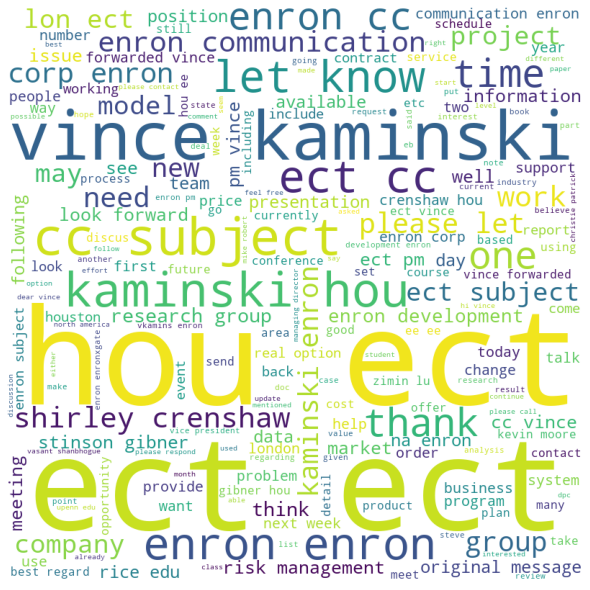

In [ ]:
#Memunculkan kata yang sering muncul di email yang bukan spam
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in dta.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(non_spam) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()     

In [ ]:
X = dta['text']
y = dta['spam']

In [ ]:
# TF-IDF (Term Frequency - Inverse Document Frequency)
#Mengukur kata dengan menghitung bobot untuk setiap katanya
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X_ct  = vectorizer.transform(X)

In [ ]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_ct,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4582, 34579)
(4582,)
(1146, 34579)
(1146,)


In [ ]:
#KNN

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_pred1 = knn_classifier.predict(X_test)
print("accuracy score is :",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy score is : 0.9720767888307156
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       856
           1       0.97      0.92      0.94       290

    accuracy                           0.97      1146
   macro avg       0.97      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146



In [ ]:
#NAIVEBAYES

nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred2 = nb.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

accuracy score is:  0.8856893542757417
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       856
           1       1.00      0.55      0.71       290

    accuracy                           0.89      1146
   macro avg       0.93      0.77      0.82      1146
weighted avg       0.90      0.89      0.87      1146



In [ ]:
#RANDOMFOREST

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

accuracy score is:  0.9773123909249564
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       856
           1       1.00      0.91      0.95       290

    accuracy                           0.98      1146
   macro avg       0.99      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [ ]:
#XGBOOST

xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred4 = xg.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

accuracy score is:  0.9677137870855148
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       856
           1       0.91      0.97      0.94       290

    accuracy                           0.97      1146
   macro avg       0.95      0.97      0.96      1146
weighted avg       0.97      0.97      0.97      1146

